#LAB 9: SUPPORT VECTOR MACHINE (SVM)


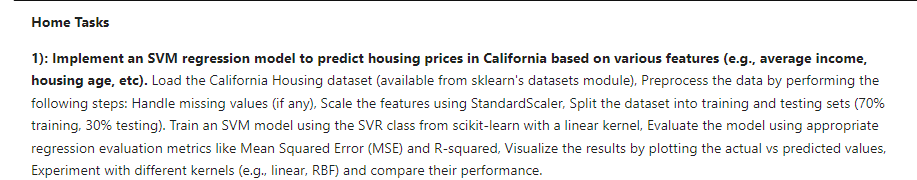

#Support Vector Machines (SVM)
Support Vector Machines (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It works by finding the optimal boundary (called a hyperplane) that best separates data points into different classes or predicts a continuous value.

#Key Concepts of SVM:
#1.Hyperplane:

In an
𝑛
n-dimensional space, a hyperplane is an
𝑛
−
1
n−1 dimensional decision boundary that separates data points into classes (e.g., a line in 2D, a plane in 3D).
The goal of SVM is to find the hyperplane with the maximum margin (the largest distance between the hyperplane and the nearest data points from any class).

#2.Support Vectors:

These are the closest data points to the hyperplane. They "support" the hyperplane by defining its position.
Removing a support vector can change the hyperplane.
Margin:

The margin is the distance between the hyperplane and the nearest support vectors.
SVM aims to maximize this margin to ensure better generalization to unseen data.

#3.Kernel Trick:

SVM can handle nonlinear relationships by transforming data into a higher-dimensional space using a kernel function.
#Common kernels include:
Linear: For linearly separable data.
RBF: For nonlinear data.
Polynomial: For polynomial relationships.


#1. Import Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#2. Load and Explore the Dataset


In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#3. Handle Missing Values



In [ ]:
print("Missing values:\n", df.isnull().sum())

df.fillna(df.mean(), inplace=True)


Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


#Why scaling features?

#Importance of Feature Scaling:
Feature scaling is essential in many machine learning algorithms, including SVM regression, for the following reasons:

#1.Equal Contribution of Features:

When features have vastly different ranges (e.g., income in thousands vs. age in years), unscaled features with larger ranges can dominate the learning process.
Scaling ensures all features contribute equally to the model.

#2.Improved Model Performance:

Algorithms like SVM, which rely on distance metrics (e.g., Euclidean distance), are sensitive to feature magnitudes.
Scaling avoids biased results caused by features with larger ranges.

#3.Faster Convergence:

Gradient-based optimization methods (used in many algorithms) converge faster when features are scaled, leading to quicker training.

#4. Feature Scaling



In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Split Data into Training and Testing Sets



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


#6. Train SVM Regression Models


In [ ]:
# Train SVR with a linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

y_pred_linear = svr_linear.predict(X_test)


#RBF Kernel

In [ ]:
# Train SVR with an RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

=7401
y_pred_rbf = svr_rbf.predict(X_test)


#7. Evaluate Models


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"R-Squared: {r2:.3f}")
    print("-" * 30)
    return mse, r2


#1. Linear Kernel
A linear kernel assumes that the relationship between the input features and the target variable can be expressed as a straight line (in regression) or a linear decision boundary (in classification).


#2. RBF Kernel (Radial Basis Function)
The RBF kernel maps the data into a higher-dimensional space where a nonlinear relationship can become linear. It measures similarity based on the distance between points in the input space.
Data points closer together (smaller
∥
𝑥
−
𝑦
∥
∥x−y∥) have higher similarity values.
Points farther apart are less similar, with the kernel value approaching 0.

#Linear Kernel Evaluation

In [ ]:
mse_linear, r2_linear = evaluate_model(y_test, y_pred_linear, "SVR (Linear Kernel)")


SVR (Linear Kernel) Performance:
Mean Squared Error (MSE): 0.554
R-Squared: 0.578
------------------------------


#RBF Kernel Evaluation

In [ ]:
mse_rbf, r2_rbf = evaluate_model(y_test, y_pred_rbf, "SVR (RBF Kernel)")


SVR (RBF Kernel) Performance:
Mean Squared Error (MSE): 0.347
R-Squared: 0.736
------------------------------


#8. Visualize Actual vs Predicted Values


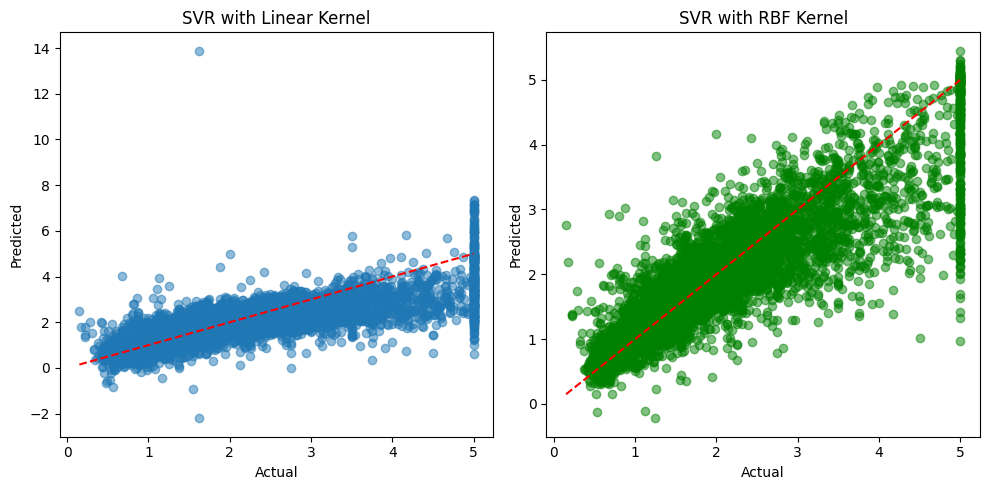

In [ ]:
# Plot actual vs predicted for both kernels
plt.figure(figsize=(10,5))

# Linear Kernel
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("SVR with Linear Kernel")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# RBF Kernel
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rbf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("SVR with RBF Kernel")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


#9. Comparison:

The RBF kernel performs better, with a lower MSE and a higher R² value, explaining approximately 73.6% of the variance. This suggests that it captures the nonlinear relationships in the data more effectively.

The linear kernel provides a moderate fit to the data, with an R² value suggesting that it explains around 57.8% of the variance in housing prices.

##                                 HOME TASK 2

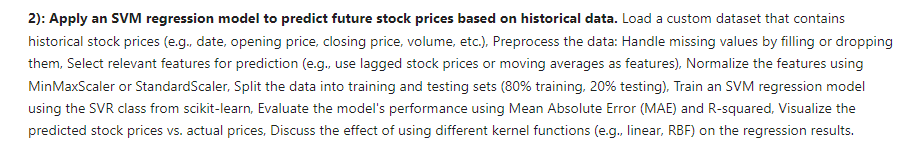

In [ ]:
import pandas as pd

file_path = 'tesla-stock-price.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


The dataset contains the following columns:

date: The date of the stock price record.

close: The closing stock price on that day (target variable for prediction).

volume: The number of stocks traded.

open: The opening stock price on that day.

high: The highest stock price on that day.
low: The lowest stock price on that day.

#Step 1: Preprocess the Data


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = data.dropna()

data['volume'] = data['volume'].replace(',', '', regex=True).astype(float)
data[['close', 'open', 'high', 'low']] = data[['close', 'open', 'high', 'low']].astype(float)

data['close_lag_1'] = data['close'].shift(1)
data['close_lag_2'] = data['close'].shift(2)

data = data.dropna()

features = ['close_lag_1', 'close_lag_2', 'volume', 'open', 'high', 'low']
X = data[features]
y = data['close']

# Preprocessing Step 4: Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


#Splitting Data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]


(array([[0.30675838, 0.30771143, 0.08713303, 0.31329541, 0.28652404,
         0.29996433],
        [0.6448846 , 0.60493929, 0.55692449, 0.60162868, 0.64477497,
         0.61751191],
        [0.86512245, 0.87771931, 0.72445445, 0.92797807, 0.97029492,
         0.94869804],
        [0.69278581, 0.68574152, 0.54801064, 0.89106682, 0.89417832,
         0.79229526],
        [0.21957486, 0.21849749, 0.06523371, 0.32066129, 0.28809666,
         0.32631822]]),
 590    214.96
 135    305.72
 48     370.34
 74     335.07
 585    219.61
 Name: close, dtype: float64)

#Step 2: Train SVM Regression Models


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and train SVR models with different kernels
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

y_pred_linear = svr_linear.predict(X_test)
y_pred_rbf = svr_rbf.predict(X_test)




#What is a Kernel in Machine Learning?
In machine learning, particularly in Support Vector Machines (SVMs), a kernel is a mathematical function that transforms data into a higher-dimensional space. This transformation allows the model to find patterns and relationships in the data that are not obvious in its original dimensions.



#The Kernel Trick:
The kernel trick avoids explicitly transforming the data to a higher-dimensional space. Instead, it computes the dot product of data points in the transformed space directly using the kernel function. This saves computational time and memory.

#Evaluate Linear Kernel

In [ ]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
(mae_linear, r2_linear)

(3.31519337303188, 0.9941985832197041)

#Evaluate RBF Kernel

In [ ]:
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

(mae_rbf, r2_rbf)

(6.18060500024251, 0.9683293579707852)

#Step 3: Visualization


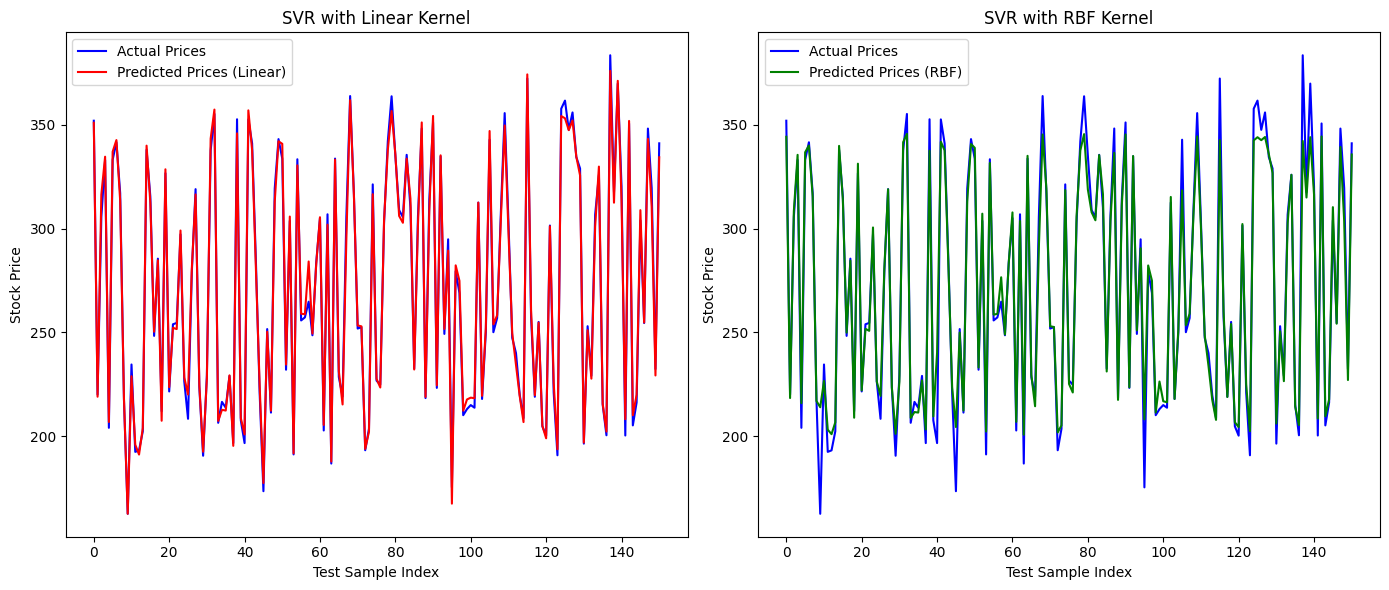

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Linear Kernel
plt.subplot(1, 2, 1)
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred_linear, label="Predicted Prices (Linear)", color='red')
plt.title("SVR with Linear Kernel")
plt.xlabel("Test Sample Index")
plt.ylabel("Stock Price")
plt.legend()

# RBF Kernel
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred_rbf, label="Predicted Prices (RBF)", color='green')
plt.title("SVR with RBF Kernel")
plt.xlabel("Test Sample Index")
plt.ylabel("Stock Price")
plt.legend()

plt.tight_layout()
plt.show()


#Comparison RBF & Linear:

The linear kernel outperforms the RBF kernel for this dataset, providing more accurate predictions (lower MAE) and a stronger fit (higher R²). This suggests that the relationship between the features and stock prices is likely linear, making the linear kernel more suitable for this task.